In [1]:
import lsst.daf.butler as dafButler
import os
import lsst.geom
import lsst.afw.display as afwDisplay
import matplotlib.pyplot as plt
afwDisplay.setDefaultBackend("matplotlib")

In [2]:
print("REPO=", os.environ['REPO'])
print("PGUSER=", os.environ['PGUSER'])

REPO= /epyc/projects/DEEP/klone_repo
PGUSER= deep_readonly


In [3]:
butler = dafButler.Butler(os.environ['REPO'])

In [4]:
# get the available difference images
detector = 4

refs = list(set(list(
    butler.registry.queryDatasets(
        "differenceExp", collections="DEEP/20190403/A0c", where=f"instrument='DECam' and detector={detector}"
    )
)))

ref = refs[0]
print(ref.dataId)

{instrument: 'DECam', detector: 4, visit: 845926, band: 'VR', physical_filter: 'VR DECam c0007 6300.0 2600.0'}


In [5]:
%%time
# get the exposure in memory
image = butler.get(ref)
type(image)

CPU times: user 5.13 s, sys: 431 ms, total: 5.56 s
Wall time: 5.66 s


lsst.afw.image._exposure.ExposureF

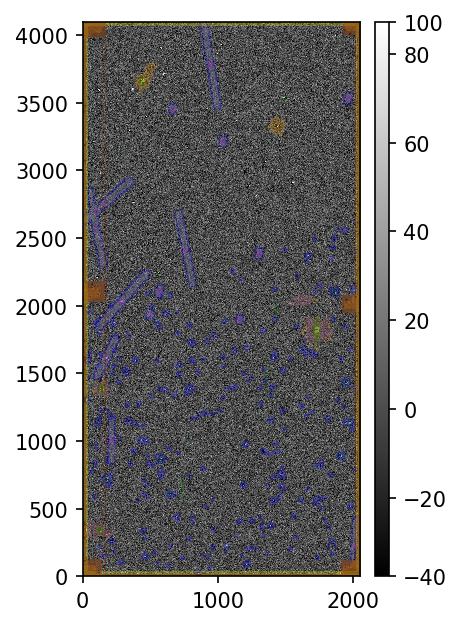

In [6]:
# plot the image

fig = plt.figure(dpi=150)
display = afwDisplay.Display(frame=fig)
display.scale("linear", "zscale")
display.mtv(image)
plt.show()

In [7]:
# mask plane colors
print(display.getMaskPlaneColor())

{'BAD': 'red', 'CR': 'magenta', 'EDGE': 'yellow', 'INTERPOLATED': 'green', 'SATURATED': 'green', 'DETECTED': 'blue', 'DETECTED_NEGATIVE': 'cyan', 'SUSPECT': 'yellow', 'NO_DATA': 'orange', 'INTRP': 'green', 'SAT': 'green'}


# Components

In [8]:
bbox = image.getBBox()
type(bbox)

lsst.geom.Box2I

In [9]:
wcs = image.getWcs()
type(wcs)

lsst.afw.geom.SkyWcs

In [10]:
wcs.pixelToSky(bbox.getCenter())

SpherePoint(215.97725286477927*degrees, -11.229279876123664*degrees)

In [11]:
psf = image.getPsf()
type(psf)

lsst.meas.algorithms.KernelPsf

In [12]:
photoCalib = image.getPhotoCalib()
type(photoCalib)

lsst.afw.image.PhotoCalib

In [13]:
# -5/2 * log10(f) + zero_point
# -5/2 * log10(1) + zero_point = zero_point
zero_point = photoCalib.instFluxToMagnitude(1) 
zero_point

31.215766947355835

# Component Refs

In [14]:
%%time
# components can be obtained without loading the entire image into memory
bbox = butler.get(ref.makeComponentRef("bbox"))
wcs = butler.get(ref.makeComponentRef("wcs"))
psf = butler.get(ref.makeComponentRef("psf"))
photoCalib = butler.get(ref.makeComponentRef("photoCalib"))

CPU times: user 194 ms, sys: 5.32 ms, total: 199 ms
Wall time: 201 ms
